## Performing Analysis of Meteorological Data
#### Author : Vedant Deshmukh

### Importing Neccessary Libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Importing Dataset

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/vedant27102001/Performing-Analysis-of-Meteorological-Data/main/Dataset.csv")
df.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


### Getting Dimensions and Details of the Data Set

In [3]:
df.shape

(96453, 11)

In [4]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


### Finding Missing Values and Handling them

In [5]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

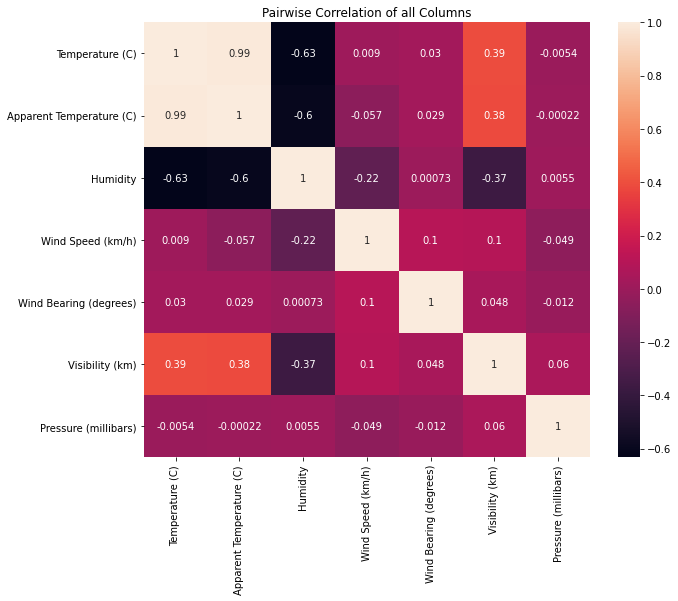

In [6]:
plt.figure(figsize = (10,8))
sns.heatmap(data = df.corr(), annot =  True)
plt.title("Pairwise Correlation of all Columns")

plt.show()

### Changing Formatted Date from String to Datetime

In [7]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)

In [8]:
df =  df.set_index("Formatted Date")
df

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...
2016-09-09 17:00:00+00:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,1014.36,Partly cloudy starting in the morning.
2016-09-09 18:00:00+00:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,1015.16,Partly cloudy starting in the morning.
2016-09-09 19:00:00+00:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,1015.66,Partly cloudy starting in the morning.


###  Creating a new Dataframe for Apparent Temperature and Humidity

In [9]:
df_column = ['Apparent Temperature (C)', 'Humidity']
df_monthly_mean = df[df_column].resample("MS").mean() #MS-Month Starting
df_monthly_mean

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625
...,...,...
2016-08-01 00:00:00+00:00,21.383094,0.674046
2016-09-01 00:00:00+00:00,18.355833,0.688833
2016-10-01 00:00:00+00:00,8.923947,0.799906


### Exploratory Data Analysis
The Null Hypothesis H0 is "Has the Apparent temperature and humidity compared monthly across 10 years of the data indicate an increase due to Global warming".

The Alternative Hypothesis H1 is "Has the Apparent temperature and humidity compared monthly across 10 years of the data not indicate an increase due to Global warming".

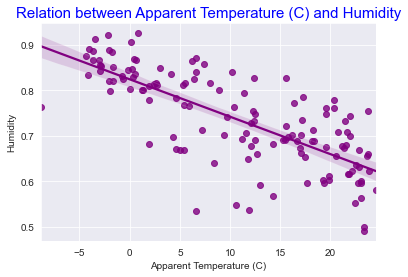

In [10]:
sns.set_style ("darkgrid")
sns.regplot(data = df_monthly_mean, x="Apparent Temperature (C)", y = "Humidity", color = "purple")
plt.title("Relation between Apparent Temperature (C) and Humidity", color = "Blue", size = 15)
plt.show()


<b>Observation:</b> There might be Linear Relationship between "Apparent Temperature (C)" and "Humidity" having negative slope.

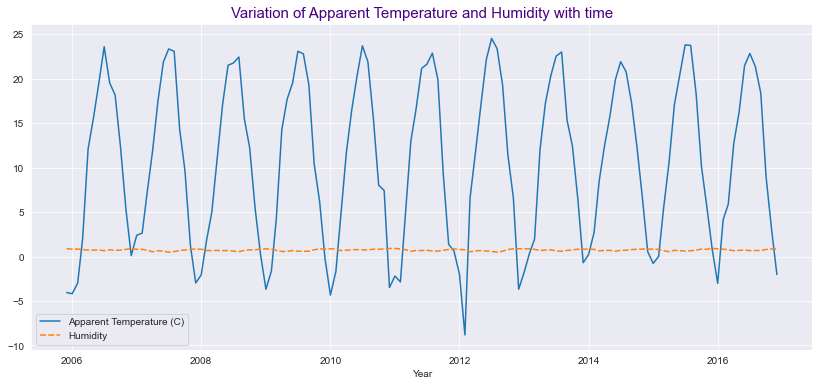

In [11]:
plt.figure(figsize=(14,6))
sns.lineplot(data = df_monthly_mean,color="red")
plt.xlabel('Year')
plt.title("Variation of Apparent Temperature and Humidity with time",color="Indigo",size=15)
# save the figure
plt.show()


<b>Observation:</b> From the above plot, "Humidity" remained constant from 2006 - 2016 "Apparent Temperature (C)" frequently changed from 2006 - 2016

### Correlation of Apparent temperature & Humidity

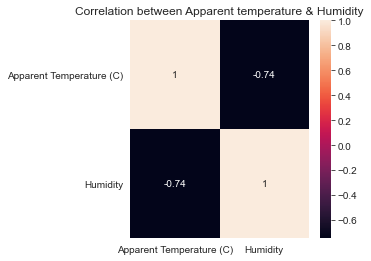

In [12]:
sns.set_style("darkgrid")
plt.figure(figsize=(4,4))
plt.title("Correlation between Apparent temperature & Humidity")
sns.heatmap(data= df_monthly_mean.corr(), annot=True)
plt.show()

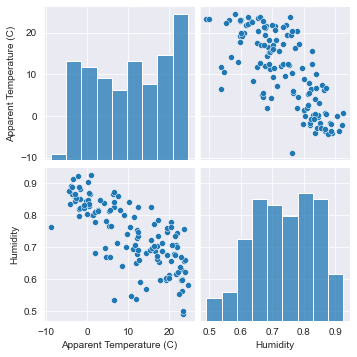

In [13]:
sns.pairplot(df_monthly_mean, kind='scatter')
plt.show()

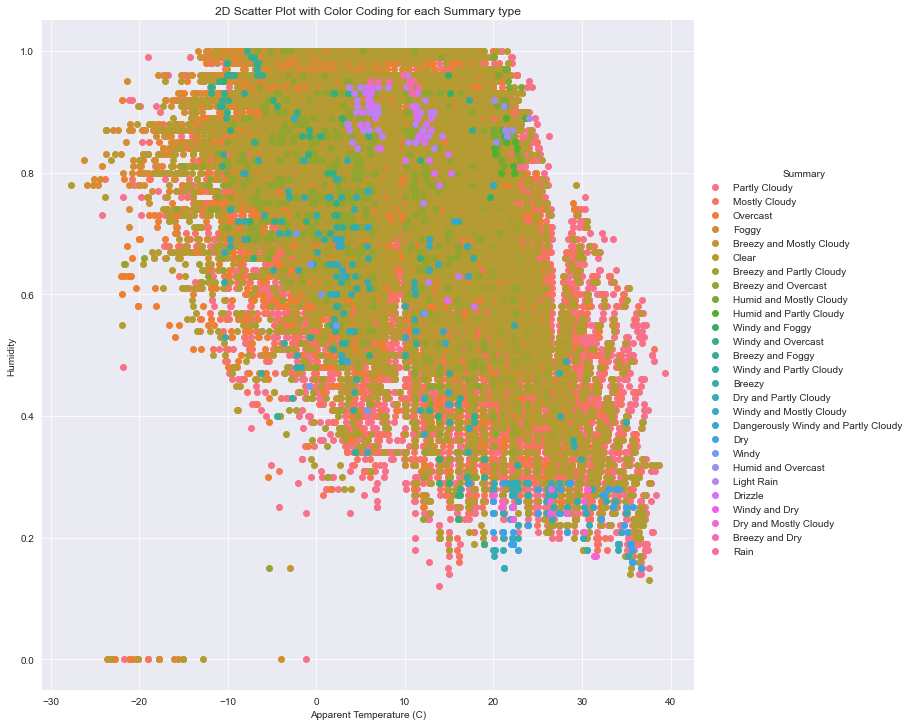

In [16]:
sns.set_style("darkgrid")
sns.FacetGrid(df, hue="Summary", height=10).map(plt.scatter, "Apparent Temperature (C)", "Humidity").add_legend()
plt.title("2D Scatter Plot with Color Coding for each Summary type")
plt.show()

<b>Observation:</b>
<ul>
<li>There are very few outlier.
<li>Mostly Weather is Clear or Partly Cloudy/Rain in Finland.
<li>Only few days there has a Light Rain or Dry or Dangerously Windy and Partly Cloudy.
</ul>

### Univariate Analysis

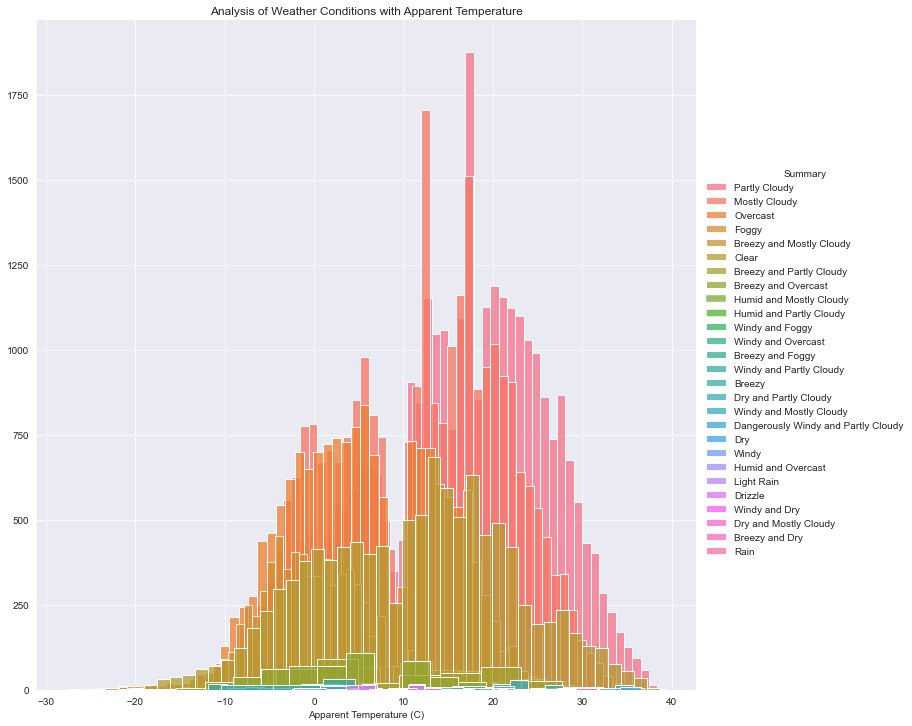

In [18]:
sns.set_style("darkgrid")
sns.FacetGrid(df, hue="Summary", height=10).map(sns.histplot, "Apparent Temperature (C)").add_legend()
plt.title("Analysis of Weather Conditions with Apparent Temperature")
plt.show()

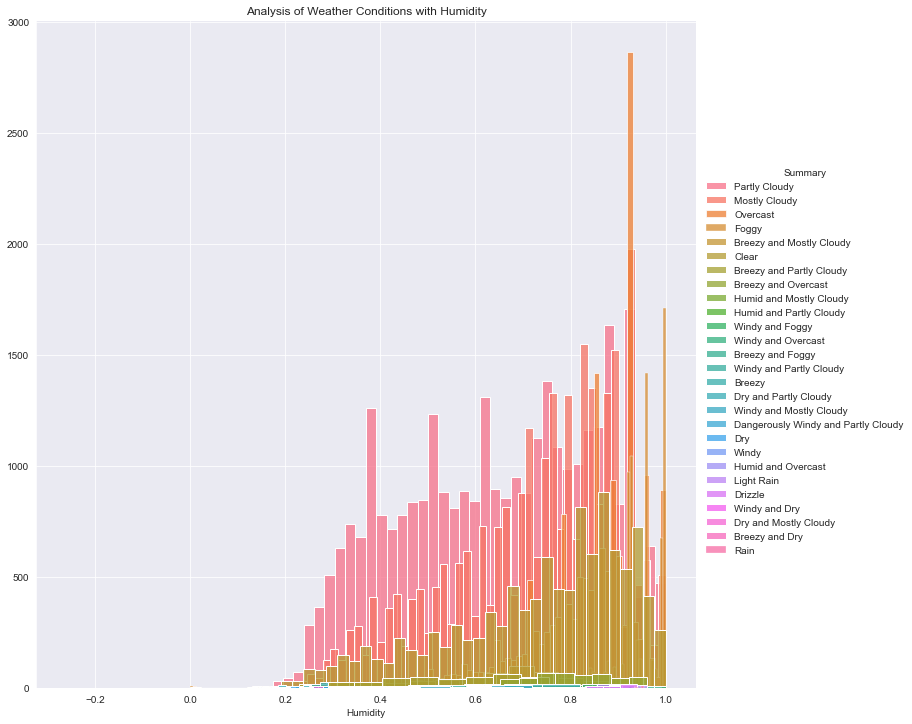

In [20]:

sns.set_style("darkgrid")
sns.FacetGrid(df, hue="Summary",height=10).map(sns.histplot, "Humidity").add_legend()
plt.title("Analysis of Weather Conditions with Humidity")
plt.show()

<b>Observation:</b> "Humidity" is better Feature than "Apparent Temperature (C)"

In [21]:
# Function for plotting Humidity & Apparent Temperature for all month
TEMP_DATA = df_monthly_mean.iloc[:,0]
HUM_DATA = df_monthly_mean.iloc[:,1]
def label_color(month):
    if month == 1:
        return 'January','blue'
    elif month == 2:
        return 'February','green'
    elif month == 3:
        return 'March','orange'
    elif month == 4:
        return 'April','yellow'
    elif month == 5:
        return 'May','red'
    elif month == 6:
        return 'June','violet'
    elif month == 7:
        return 'July','purple'
    elif month == 8:
        return 'August','black'
    elif month == 9:
        return 'September','brown'
    elif month == 10:
        return 'October','darkblue'
    elif month == 11:
        return 'November','grey'
    else:
        return 'December','pink'
def plot_month(month, data):
    label, color = label_color(month)
    mdata = data[data.index.month == month]
    sns.lineplot(data=mdata,label=label,color=color,marker='o')
    
def sns_plot(title, data):
    plt.figure(figsize=(14,8))
    plt.title(title)
    plt.xlabel('YEAR')
    for i in range(1,13):
        plot_month(i,data)
    plt.show()

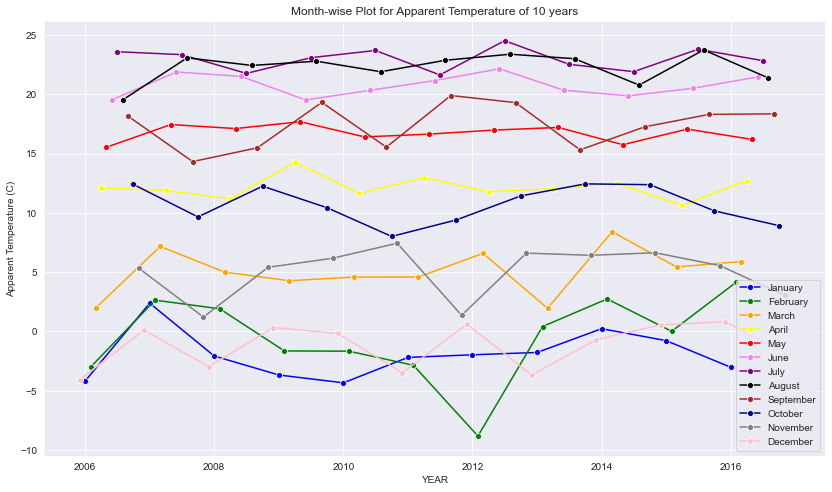

In [22]:
# Month-wise Plot for Apparent Temperature of 10 years 
title = 'Month-wise Plot for Apparent Temperature of 10 years' 
sns_plot(title, TEMP_DATA)

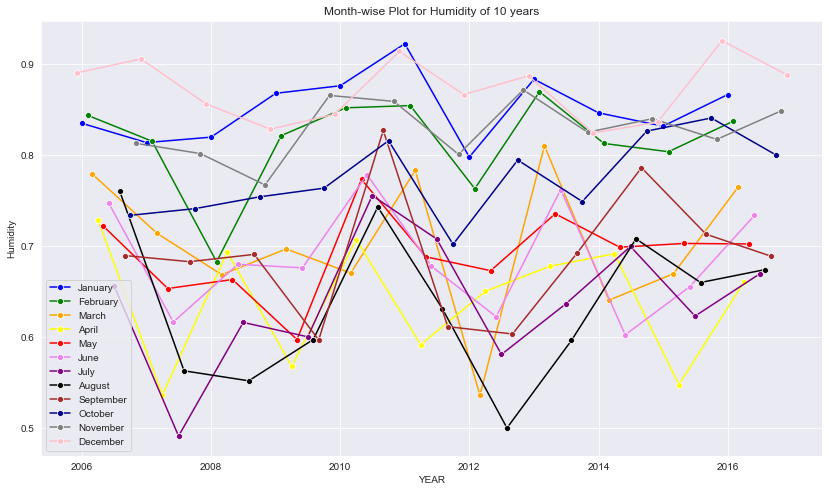

In [23]:
# Month-wise Plot for Humidity of 10 years 
title = 'Month-wise Plot for Humidity of 10 years' 
sns_plot(title, HUM_DATA)

In [24]:
# Function for plotting Apparent Temperature & Humidity for each month
def sns_month_plot(month):
    plt.figure(figsize=(10,5))
    label = label_color(month)[0]
    plt.title('Apparent Temperature Vs Humidity for {}'.format(label))
    plt.xlabel('YEAR')
    data = df_monthly_mean[df_monthly_mean.index.month == month]
    sns.lineplot(data=data, marker='o')
    name="month"+str(month)+".png" 
    plt.show()
    print('-'*80)

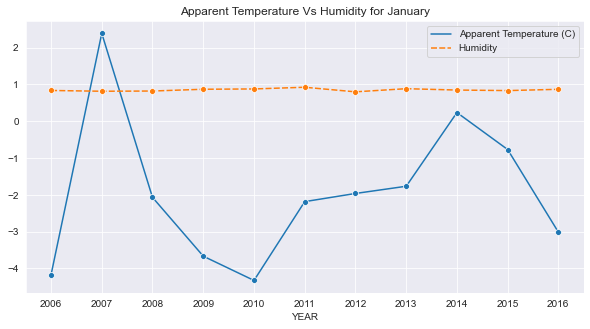

--------------------------------------------------------------------------------


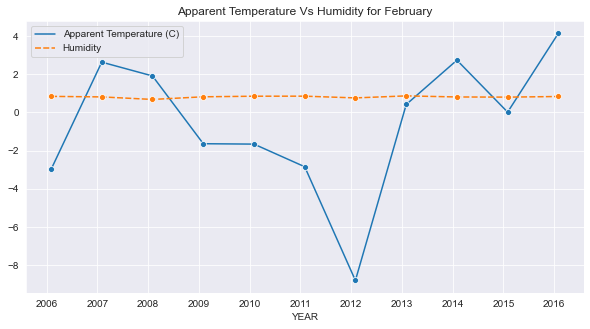

--------------------------------------------------------------------------------


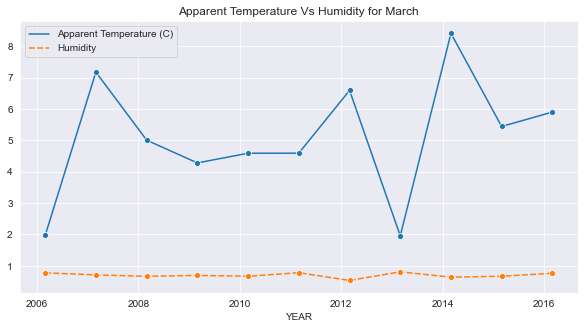

--------------------------------------------------------------------------------


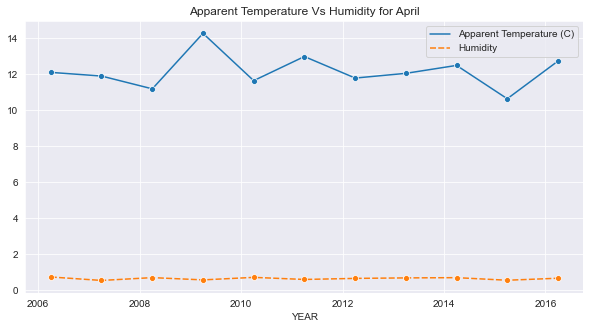

--------------------------------------------------------------------------------


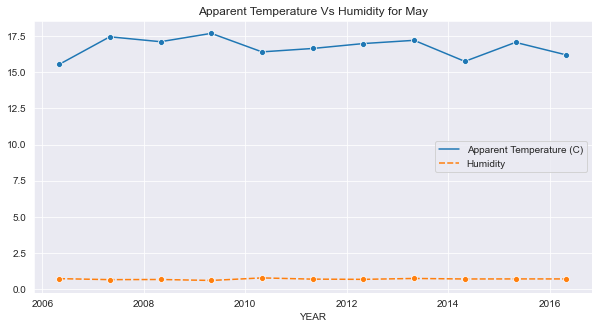

--------------------------------------------------------------------------------


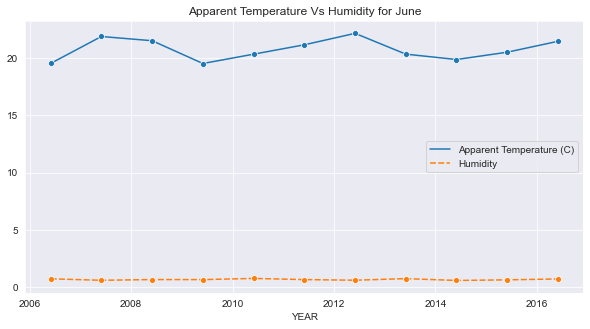

--------------------------------------------------------------------------------


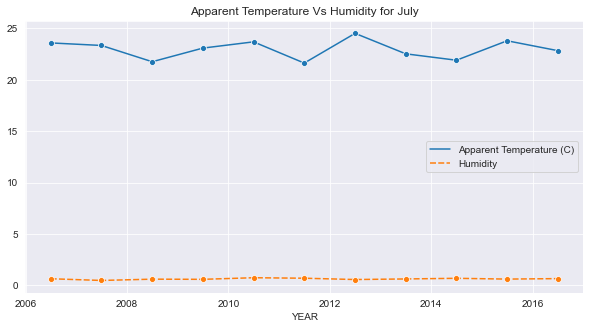

--------------------------------------------------------------------------------


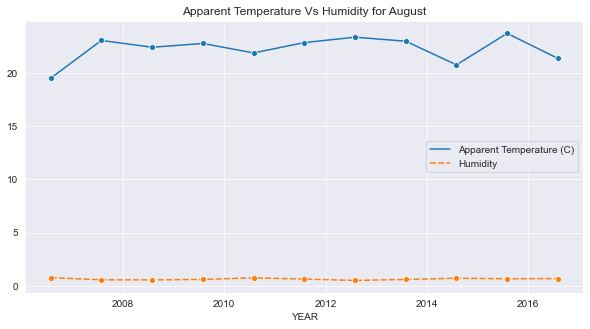

--------------------------------------------------------------------------------


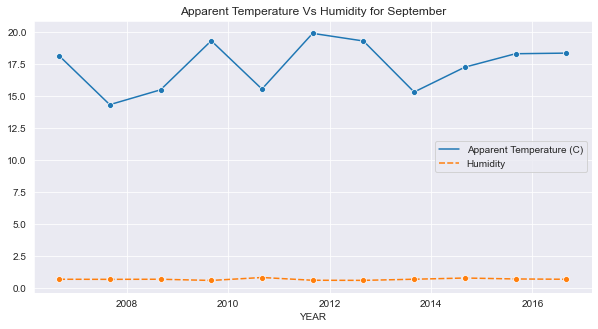

--------------------------------------------------------------------------------


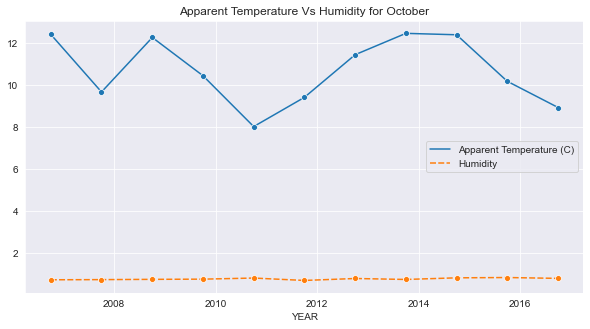

--------------------------------------------------------------------------------


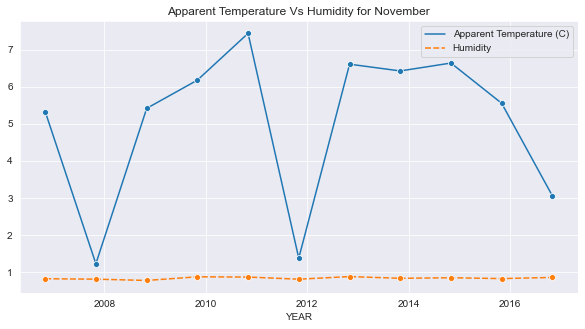

--------------------------------------------------------------------------------


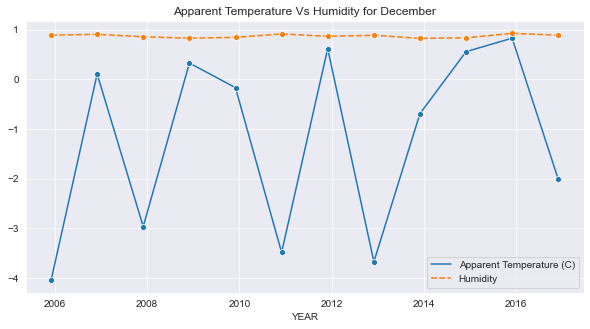

--------------------------------------------------------------------------------


In [25]:
# plot for the month of JANUARY - DECEMBER
for month in range(1,13):
    sns_month_plot(month)

<b>Final Interpretation:</b> 
<ul>
<li>There are many ups and downs in the temperature and the average humidity has remained constant throughout the 10 years. 
   <li>We can conclude that global warming has caused an uncertainty in the temperature over the past 10 years.
       </ul>